### Importación de Bibliotecas

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.transform import resize
from skimage.color import rgb2gray

imagen_original = rgb2gray(data.rocket())
imagen = resize(imagen_original, (300, 200))

In [4]:
U, S, VT = np.linalg.svd(imagen)
print(VT.shape)

(200, 200)


In [5]:
def reconstruir_con_k(k):
  U_k = U[:, :k]
  S_k = np.diag(S[:k])
  VT_k = VT[:k, :]

  imagen_reconstruida = U_k @ S_k @ VT_k
  return imagen_reconstruida

In [6]:
k_valores = [5, 20, 50]
imagenes_reconstruidas = [reconstruir_con_k(k) for k in k_valores]

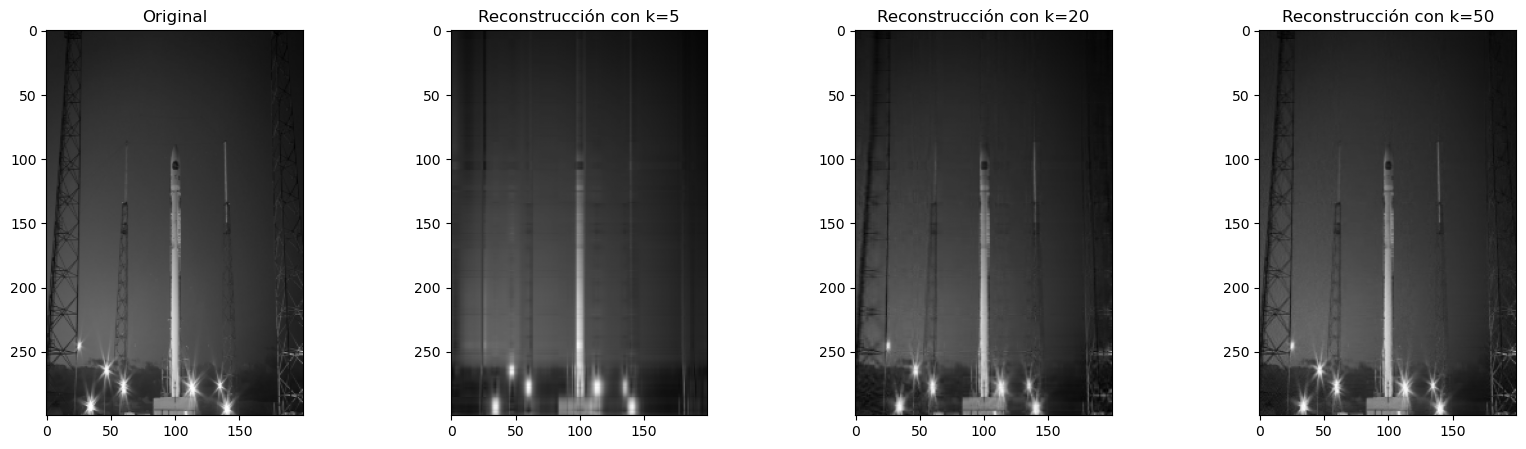

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(imagen, cmap='gray')
axes[0].set_title('Original')

for i, k in enumerate(k_valores):
  axes[i+1].imshow(imagenes_reconstruidas[i], cmap='gray')
  axes[i+1].set_title(f'Reconstrucción con k={k}')

plt.show()